Group Members: 
- Pflum, Jordan
- Walton, Troy
- Wang, Nai
               
Due Date: 07/29/2020

# NYC Restraunts
We will analyze restraurnt inspections in New York City, starting November 1, 2014 and ending January 31, 2015. The data is in the file NYC_Restaurants.csv

**Setup:** First read in the data using
* df = pd.read_csv('NYC_Restaurants.csv', dtype=str)

This ensures that all fields are read in as strings, and loading the data is relatively fast.

In [207]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

df = pd.read_csv('NYC_Restaurants.csv', dtype=str)

Populating the interactive namespace from numpy and matplotlib


In [208]:
# Data Cleansing
# Remove Missing Borough Information
mask = (df['BORO'] == 'Missing')
df.loc[mask, 'BORO'] = np.nan # This sets the value to NaN

# Change Missing Violation Code to "No Citation"
mask = df['VIOLATION CODE'].isnull()
df.loc[mask, 'VIOLATION CODE'] = "No Vilolation"


## Q1 (6pts)
Create a unique name for each restaurant. On the
DataFrame created above, add a new column to your DataFrame, called
'RESTAURANT', that combines DBA, BUILDING, STREET, ZIPCODE,
and BORO fields. For example, "WENDY'S 469 FLATBUSH AVENUE
11225 BROOKLYN". Print the first 10 values of the RESTAURANT column
of your DataFrame.

In [101]:
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df["STREET"] + ' ' + df["ZIPCODE"] + ' ' + df["BORO"]

## Q2 (6pts)
How many restaurants are included in the data? Careful now:
* A "Subway in one particular address (ie, building, street, zipcode, and boro) counts as one restaurant; don't combine all Subways into one restaurant!
* The data can have multiple violations for the same restaurant!

In [102]:
uniqueRestaurantsDF = df.drop_duplicates(subset='RESTAURANT')
uniqueRestaurantsDF["RESTAURANT"].size

10101

## Q3 (6 pts)
How many chains are there? Let us define a chain to be the same restaurant name occurring in at least two different (building, streeet, zipcode, boro) addresses (ie, one DBA with multiple restaurant locations). You'll see multiple versions of the name "DUNKIN DONUTS". Just act as if they are different chains.

In [103]:
# Get Number of Restraunts per DBA name
numRestaurantPerRestaurant = uniqueRestaurantsDF['DBA'].value_counts()

# Keep only restraunts where their name occur more than once
numRestaurantPerRestaurant_mask = (numRestaurantPerRestaurant > 1)
chainRestaurants = numRestaurantPerRestaurant[numRestaurantPerRestaurant_mask]
numChians = chainRestaurants.size

# Print number of chains
numChians

368

## Q4 (6pts)
Plot a bar graph of the top 20 most popular chains. We already have the chains from the previous problem. Count the number of restaurants for each chain as a measure of its popularity.

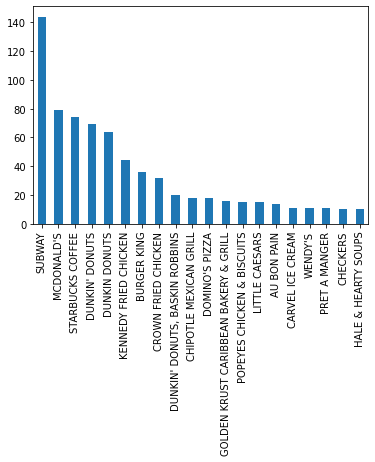

In [104]:
top20Chains = chainRestaurants[:20]
top20Chains.plot(kind='bar')

## Q5 (6pts)
What fraction of all restaurants are chain restaurants?

In [105]:
# Calculate Total num of Restaurants
numTotalRestaurants = numRestaurantPerRestaurant.sum()

# Calculate Total num of Restaurants that are Chains
numTotalChainRestraunts = chainRestraunts.sum()

# Calculate Percent of Resaurants that are Chains
percentChainRestraunts = numTotalChainRestraunts/numTotalRestaurants

percentChainRestraunts
#uniqueRestaurantsDF[mask_ChainRestaurant,].size

0.16493416493416493

## Q6 (6pts)
Plot the number of non-chain restaurants in each boro. First, we need to figure out all the non-chain restaurants, then select out only those restaurants, and finally plot the number of such restaurants by boro. Make sure to look at plot; we don't want to see...oh...the "missing boro.

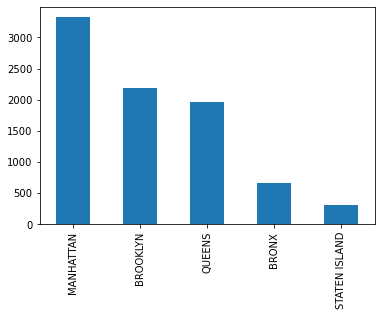

In [106]:
# Get Number of Restraunts per DBA name
numRestaurantPerRestaurant = uniqueRestaurantsDF['DBA'].value_counts()

# Keep only restraunts where their name occur only once (non-chains)
numRestaurantPerRestaurant_mask = (numRestaurantPerRestaurant == 1)
nonchainRestaurants = numRestaurantPerRestaurant[numRestaurantPerRestaurant_mask]
nonchainRestaurantsList = nonchainRestaurants.index.tolist()

# Adjust Original Dataframe
mask = uniqueRestaurantsDF['DBA'].isin(nonchainRestaurantsList)
nonChianRestaurants = uniqueRestaurantsDF[mask]

numNonchainRestaurantsPerBoro = nonChianRestaurants['BORO'].value_counts()

numNonchainRestaurantsPerBoro.plot(kind='bar')

## Q7 (6pts)
Plot the fraction of non-chain restaurants in each boro. The boro with the most non-chain restaurants might just be the boro with the most restaurants in general. If we want to find the boro that attracts the most "independent" restauranteurs, we must divide the number of non-chain restaurants by the total number of restaurants in the boro. Plot this.

Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants?

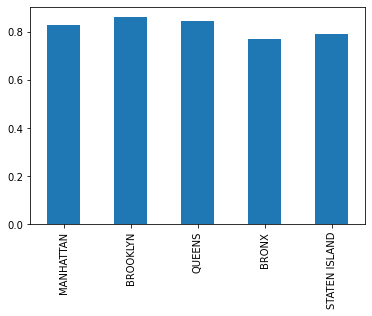

In [107]:
# Get Number of Restraunts per DBA name
numRestaurantPerRestaurant = uniqueRestaurantsDF['DBA'].value_counts()

# Non-Chains
# Keep only restraunts where their name occur only once (non-chains)
numRestaurantPerRestaurant_mask = (numRestaurantPerRestaurant == 1)
nonchainRestaurants = numRestaurantPerRestaurant[numRestaurantPerRestaurant_mask]
nonchainRestaurantsList = nonchainRestaurants.index.tolist()

# Create Dataframe with only non-chain restaurants
mask = uniqueRestaurantsDF['DBA'].isin(nonchainRestaurantsList)
nonChianRestaurants = uniqueRestaurantsDF[mask]

# Count number of non chain restaurants per boro
numNonchainRestaurantsPerBoro = nonChianRestaurants['BORO'].value_counts()

# Total Restaurants Per Boro
restaurantsPerBoro = uniqueRestaurantsDF['BORO'].value_counts()

nonChainRestaurantsPerBoroRatio = numNonchainRestaurantsPerBoro / restaurantsPerBoro

nonChainRestaurantsPerBoroRatio.plot(kind='bar')

## Q8 (6pts)
Plot the popularity of cuisines. Which cuisines are the most well-represented among all restaurants? Define the popularity of a cuisine as the number of restaurants serving that cuisine. Plot the popularity of the top 20 cuisines.

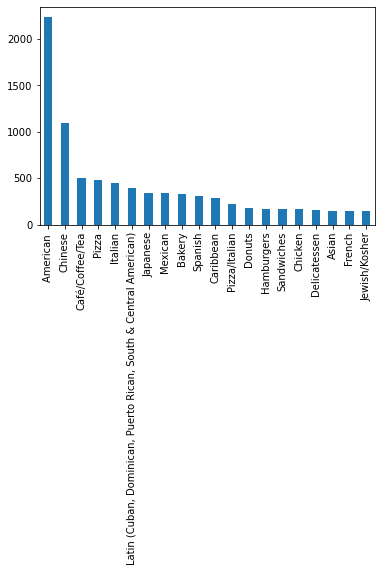

In [114]:
# Count of Restaurants by Cuisine
cuisinePopularity = uniqueRestaurantsDF['CUISINE DESCRIPTION'].value_counts()

# Plot top 20 cuisines
top20Cuisines = cuisinePopularity[:20]
top20Cuisines.plot(kind='bar')

## Q9 (9pts)
Plot the cuisines among restaurants which never got cited for violations. Ideally, you should explore and see what happens when there is no violation, but here I will just tell you: the 'VIOLATION CODE' field is missing.

First, find the restaurants that were never cited for a code violation. Then compute the populartity of each cuisine among these "clean" restaurants. Plot the popularity of the top-20 among these cuisines.

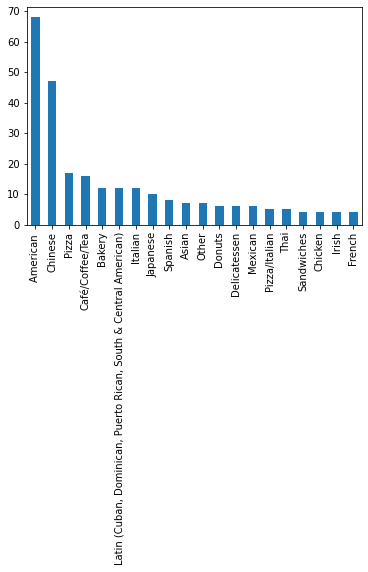

In [115]:
# Find Clean Restaurants (ie restaurants with no citations)
mask = (uniqueRestaurantsDF['VIOLATION CODE'] == "No Vilolation")
cleanRestaurants = uniqueRestaurantsDF[mask]

# Count Cuisines in Clean Restaurants
cuisinePopularity = cleanRestaurants['CUISINE DESCRIPTION'].value_counts()

# Plot top 20 clean restaurants cuisines
top20CleanRestaurantCuisines = cuisinePopularity[:20]
top20CleanRestaurantCuisines.plot(kind='bar')

## Q10 (pts6)
What cuisines tend to be the "cleanest"?
* Select all cuisines for which there were at least 20 restaurants representing that cuisine.
* For each such cuisine, compute the ratio of the counts in Q9 to Q8. This is the ratio of restaurants that never got cited, versus total number of restaurants, for each cuisine.
* Find the top-10 cuisines with the highest ratios; these are those cuisines whose restaurants are "most likely to be clean."

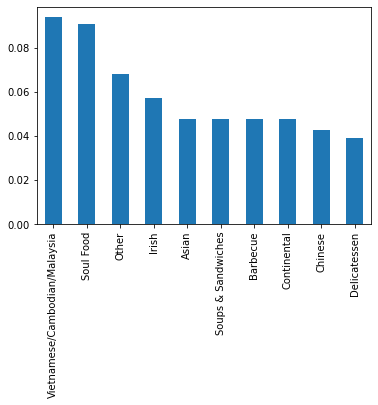

In [140]:
# Count of Restaurants by Cuisine
cuisinePopularity = uniqueRestaurantsDF['CUISINE DESCRIPTION'].value_counts()

# Keep only cuisines that appear 20 or more times
numRestaurantPerRestaurant_mask = (cuisinePopularity >= 20)
popularCuisineCounts = cuisinePopularity[numRestaurantPerRestaurant_mask]
popularCuisineList = popularCuisineCounts.index.tolist()

# Create Dataframe with only popular cuisines
mask = uniqueRestaurantsDF['CUISINE DESCRIPTION'].isin(popularCuisineList)
popularCuisineRestaurants = uniqueRestaurantsDF[mask]

# Compute total restaurants for each cuisine
totalRestaurantsPerCuisine = popularCuisineRestaurants['CUISINE DESCRIPTION'].value_counts()

# Compute total restaurants for each cuisine that has never been cited
mask = (popularCuisineRestaurants['VIOLATION CODE'] == "No Vilolation")
cleanRestaurants = popularCuisineRestaurants[mask]

# Count Cuisines in Clean Restaurants
cleanCuisinePopularity = cleanRestaurants['CUISINE DESCRIPTION'].value_counts()

# Compute Ratio of Clean Cuisines vs Total Cuisines
cleanPopularCuisineRatio = cleanCuisinePopularity / totalRestaurantsPerCuisine

# Drop NAs
mask = cleanPopularCuisineRatio.notnull()
cleanPopularCuisineRatio = cleanPopularCuisineRatio[mask]

# Sort Values
cleanPopularCuisineRatio = cleanPopularCuisineRatio.sort_values(ascending=False)


# Plot Top 10 Cuisines with highest Ratio
top20CuisineRatios = cleanPopularCuisineRatio[:10]
top20CuisineRatios.plot(kind='bar')

## Q11 (8pts)
What are the most common violations in wach borough? Create a table of the number of times each violation description was observed in each borough, and figure out the most common violation description for each borough. 

To create the table, check out the crosstab function. We will see a more general version of this when we discuss groupby in class.

One you do have the table, you will still need to find the most common violation description for each borough.

In [202]:
# Using Group By
#violationPerBorough = uniqueRestaurantsDF.groupby('BORO')['VIOLATION CODE'].value_counts()

# Using Crosstab
violationPerBorough = pd.crosstab(uniqueRestaurantsDF['BORO'], uniqueRestaurantsDF['VIOLATION CODE'])

# Print Out Top Violations per Borough
for boro in violationPerBorough.index:
    # Sort Violations for each Borough
    violationSorted = violationPerBorough.loc[boro].sort_values(ascending=False)
    print(str(str(boro) + ': ' + str(violationSorted.index[0]) + ', '+ str(violationSorted[0])))


BRONX: 04L, 134
BROOKLYN: 02B, 373
MANHATTAN: 02G, 646
QUEENS: 02B, 331
STATEN ISLAND: 02G, 62


## Q12 (9pts)
What are the most common violations per borough, after normalizing for the relative abundance of each violation? Hopefully, the answer to the previous question left you unsatisfied, because some violations are just very common, irrespective of borough. A better approach would be to normalize the violation counts, as follows.
* Get overall frequencies: Figure out how common each violation is, over the entire dataset; lets call this violationFrequency.
* Normalize: Consider the table of number of violations by boro that you created for the previous question. For each borough, divide the number of violations of each type by the total number of violations for that type; ie, divide the series of violations by violationFrequency. We want to do this for each borough.
* Find the biggest violations: Now, after this normalization, for each borough, figure out the most common violation description.

In [204]:
# Get Overall Frequencies
violationFrequency = uniqueRestaurantsDF['VIOLATION CODE'].value_counts()

# Normalize

# Print Out Top Violations per Borough
for boro in violationPerBorough.index:
    # Normalize Violations for each Borough
    violationNormalized = violationPerBorough.loc[boro] / violationFrequency
    
    # Sort Violations
    violationNormalizedSorted = violationNormalized.sort_values(ascending=False)
    
    print(str(str(boro) + ': ' + str(violationNormalizedSorted.index[0]) + ', '+ str(violationNormalizedSorted[0])))

BRONX: 05C, 1.0
BROOKLYN: 07A, 1.0
MANHATTAN: 16A, 1.0
QUEENS: 16C, 1.0
STATEN ISLAND: 05E, 0.2
